In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


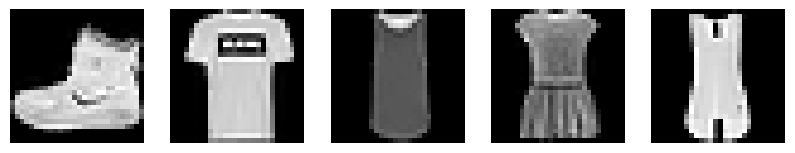

In [2]:
# Cargar el dataset Fashion-MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalizar los datos

# Mostrar algunas imágenes del dataset
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].axis('off')
plt.show()


 Consignas para los alumnos:
 1. Analiza la estructura de la red neuronal correcta y observa la función de cada capa.
 2. Reordena las capas del modelo para que coincidan con el modelo correcto.
 3. Una pista: empieza con Flatten y termina con la capa de 10 neuronas con softmax.
 4. Luego de corregir el modelo, compílalo y entrénalo para verificar su accuracy.
 5. Calcula el accuracy del modelo corregido.

 PS: para la compilaciòn: optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

 PS2: para el entrenamiento no màs de 5 e`pocas y validarlo.

 usando las siguientes capas
 Dense(10, activation='softmax')
Dense(256, activation='relu'),
Dropout(0.2),
Dropout(0.2),
Dense(128, activation='relu'),
Flatten(input_shape=(28, 28)),
Dense(512, activation='relu'),


Capas a usar.

In [ ]:
#Dense(10, activation='softmax')
#Dense(256, activation='relu'),
#Dropout(0.2),
#Dropout(0.2),
#Dense(128, activation='relu'),
#Flatten(input_shape=(28, 28)),
#Dense(512, activation='relu'),


In [3]:
# modelo secuencial
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# entrenamiento
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# accuracy
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.7618 - loss: 0.6593 - val_accuracy: 0.8397 - val_loss: 0.4430
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8485 - loss: 0.4119 - val_accuracy: 0.8616 - val_loss: 0.3857
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8600 - loss: 0.3795 - val_accuracy: 0.8682 - val_loss: 0.3677
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8715 - loss: 0.3493 - val_accuracy: 0.8604 - val_loss: 0.3848
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8782 - loss: 0.3309 - val_accuracy: 0.8735 - val_loss: 0.3458
313/313 - 1s - 3ms/step - accuracy: 0.8735 - loss: 0.3458

Test accuracy: 0.8734999895095825


In [ ]:
# Explicación para los alumnos:
# Esta red neuronal recibe imágenes de 28x28 píxeles en escala de grises y las clasifica en 10 categorías de ropa.
# Utiliza capas densas (fully connected) con activación ReLU y una capa final con activación softmax para la clasificación.
# Además, emplea Dropout para reducir el sobreajuste.


El resultado obtenido, nos indica que el modelo ha clasificado correctamente el 87% de las imágenes de prueba.  Si bien no es perfecto, es un buen punto de partida.  Se podría buscar mejorar este valor mediante la experimentación con diferentes arquitecturas, hiperparámetros (como la tasa de aprendizaje, el número de capas, neuronas por capa, épocas de entrenamiento, etc.), o técnicas de aumento de datos.